# Alunos

- Vinicius Luiz Nunes Da Fonseca - 22050031

# Configurando Ambiente


## Importando bibliotecas

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Caminho dos Arquivos

In [6]:
PATH_SAIDA = "output/"

## Funções Auxiliares

In [49]:
def mostrar_imagem(img, titulo="Imagem"):
    """
    Mostra a imagem em um notebook, convertendo de BGR -> RGB.
    """
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(titulo)
    plt.axis("off")
    plt.show()

# Questões

## 1. Alteração de Brilho

In [50]:
def alterar_brilho(img, valor):
    """
    Altera o brilho somando 'valor' a cada pixel.
    """
    # converte para int16 para evitar overflow
    img_temp = img.astype(np.int16)  
    img_temp = img_temp + valor      # soma escalar em todos os canais
    img_temp = np.clip(img_temp, 0, 255)  # mantém no intervalo válido
    return img_temp.astype(np.uint8)

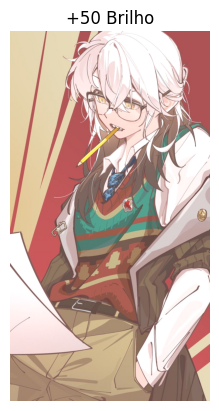

In [51]:
img = cv2.imread("img.jpg")
img_brilho = alterar_brilho(img, 50)

cv2.imwrite(PATH_SAIDA+"saida_brilho+50.jpg", img_brilho)
mostrar_imagem(img_brilho, "+50 Brilho")

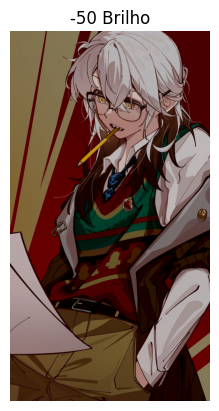

In [52]:
img = cv2.imread("img.jpg")
img_brilho = alterar_brilho(img, -50)

cv2.imwrite(PATH_SAIDA+"saida_brilho-50.jpg", img_brilho)
mostrar_imagem(img_brilho, "-50 Brilho")

## 2. Imagem Negativa

In [22]:
def negativo(img):
    return 255 - img

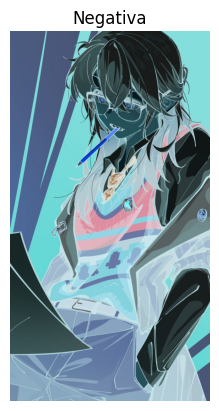

In [55]:
img = cv2.imread("img.jpg")
img_neg = negativo(img)

cv2.imwrite(PATH_SAIDA+"saida_negativa.jpg", img_neg)
mostrar_imagem(img_neg, "Negativa")

## 3. Histograma Global

In [57]:
def histograma_global(img):
    h_r, _ = np.histogram(img[:,:,0], bins=256, range=(0,256))  # R
    h_g, _ = np.histogram(img[:,:,1], bins=256, range=(0,256))  # G
    h_b, _ = np.histogram(img[:,:,2], bins=256, range=(0,256))  # B
    
    # concatena em um único vetor (R seguido de G seguido de B)
    hist_concat = np.concatenate([h_r, h_g, h_b])
    return hist_concat, (h_r, h_g, h_b)


In [67]:
img = cv2.imread("img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

hist_concat, (h_r, h_g, h_b) = histograma_global(img)

np.savetxt(PATH_SAIDA+"histograma_global.txt", hist_concat, fmt="%d")

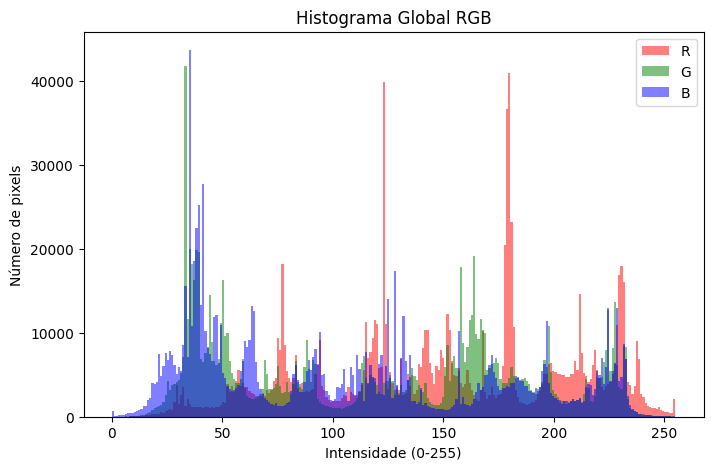

In [68]:
plt.figure(figsize=(8,5))
plt.hist(img[:,:,0].ravel(), bins=256, color='red', alpha=0.5, label="R")
plt.hist(img[:,:,1].ravel(), bins=256, color='green', alpha=0.5, label="G")
plt.hist(img[:,:,2].ravel(), bins=256, color='blue', alpha=0.5, label="B")
plt.title("Histograma Global RGB")
plt.xlabel("Intensidade (0-255)")
plt.ylabel("Número de pixels")
plt.legend()
plt.show()

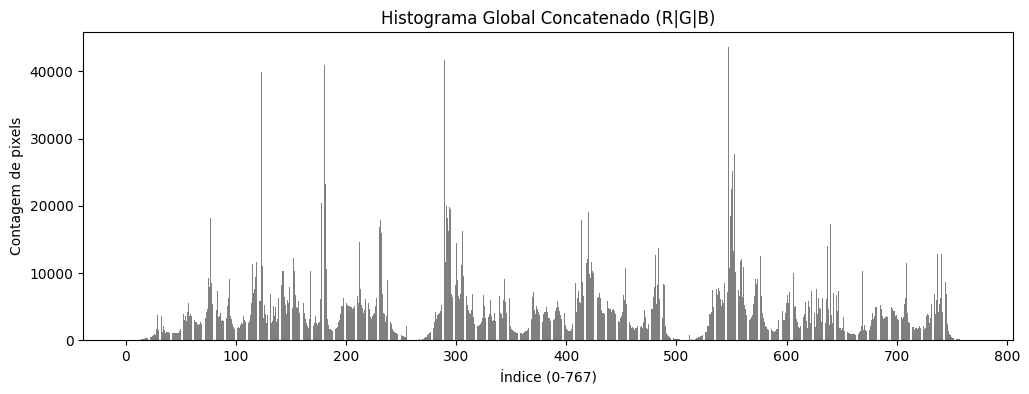

In [69]:
plt.figure(figsize=(12,4))
plt.bar(range(len(hist_concat)), hist_concat, color='gray')
plt.title("Histograma Global Concatenado (R|G|B)")
plt.xlabel("Índice (0-767)")
plt.ylabel("Contagem de pixels")
plt.show()

## 4. Histograma Local

In [71]:
def histograma_local(img, n_particoes=3):
    """Divide a imagem em n_particoes horizontais e calcula histograma RGB para cada parte"""
    h, w, _ = img.shape
    step = h // n_particoes
    todos_hist = []
    
    for i in range(n_particoes):
        inicio = i * step
        fim = (i+1) * step if i < n_particoes-1 else h  # último pega até o fim
        bloco = img[inicio:fim, :, :]
        
        hist_concat, _ = histograma_global(bloco)
        todos_hist.append(hist_concat)
    
    # concatena todos os histogramas das partições em um único vetor
    return np.concatenate(todos_hist)

In [74]:
img = cv2.imread("img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Calcular histograma local com 3 partições
hist_local = histograma_local(img, n_particoes=3)

# Salvar em arquivo .txt
np.savetxt("histograma_local.txt", hist_local, fmt="%d")

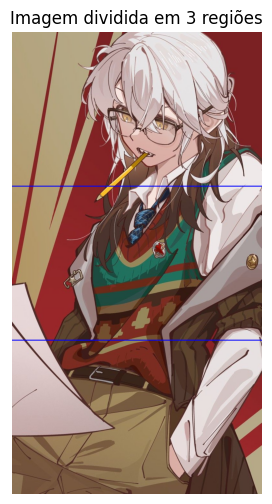

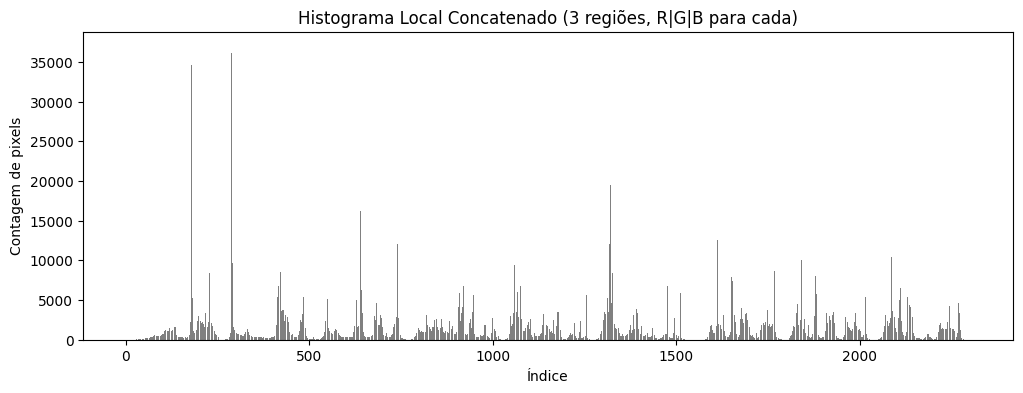

In [78]:
img_copy = img.copy()
h, w, _ = img.shape
step = h // 3
for i in range(1, 3):
    img_copy = cv2.line(img_copy, (0, i*step), (w, i*step), (0,0,255), 2)

plt.figure(figsize=(6,6))
plt.imshow(img_copy)
plt.title("Imagem dividida em 3 regiões")
plt.axis("off")
plt.show()

# Exibir histograma concatenado das partições
plt.figure(figsize=(12,4))
plt.bar(range(len(hist_local)), hist_local, color="gray")
plt.title("Histograma Local Concatenado (3 regiões, R|G|B para cada)")
plt.xlabel("Índice")
plt.ylabel("Contagem de pixels")
plt.show()